Name: **Luong Nguyen**  
Student ID: **1504210**  

## Introduction to Deep Learning 

### Session04: fashion MNIST with convolutional network
____

**Import the packages needed for this assignment**

In [0]:
# uncomment to install keras on google colab
# !pip install -q keras

In [3]:
# import packages
import numpy as np
from keras import models, layers
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt

Using TensorFlow backend.


**Prepare data** (reuse code from session 3)

In [4]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 4s 1us/step


In [5]:
print("x_train shape: %s" % (str(x_train.shape)))
print("y_train shape: %s" % (str(y_train.shape)))
print("x_test shape: %s" % (str(x_test.shape)))
print("y_test shape: %s" % (str(y_test.shape)))

x_train shape: (60000, 28, 28)
y_train shape: (60000,)
x_test shape: (10000, 28, 28)
y_test shape: (10000,)


In [6]:
images_indices = []
# get the first index of every class label 
for i in range(10):
    images_indices.append(np.argwhere(y_train == i)[0].item())
images_indices

[1, 16, 5, 3, 19, 8, 18, 6, 23, 0]

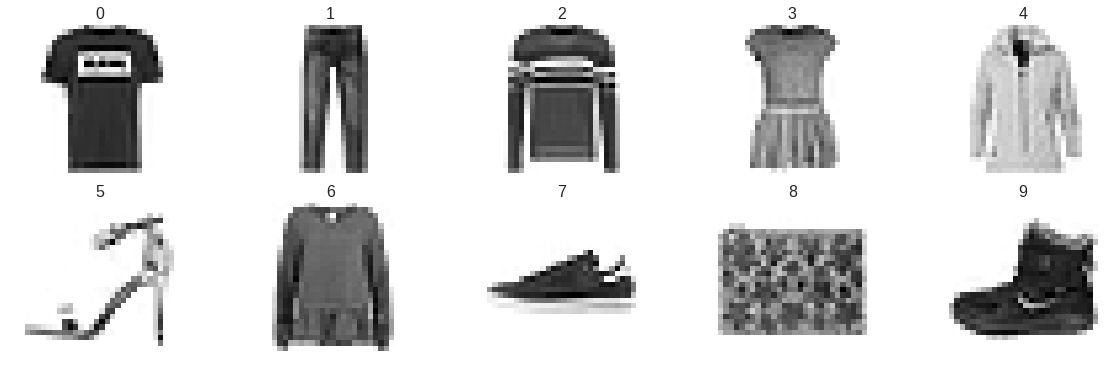

In [7]:
# plot example of every class label
rows = 2
f = plt.figure(figsize=(20,6))
for i in range(len(images_indices)):
    sp = f.add_subplot(rows, len(images_indices)//rows, i+1)
    sp.axis('Off')
    sp.set_title(y_train[images_indices[i]], fontsize=16)
    plt.imshow(x_train[images_indices[i]], cmap=plt.cm.binary)        

In [0]:
# preprocess data
x_train = x_train.reshape((60000, 28, 28, 1))
x_train = x_train.astype('float32') / 255
x_test = x_test.reshape((10000, 28, 28, 1))
x_test = x_test.astype('float32') / 255

# categorically encode the labels
from keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [9]:
# Data shape after preprocessing
print("x_train shape: %s" % (str(x_train.shape)))
print("y_train shape: %s" % (str(y_train.shape)))
print("x_test shape: %s" % (str(x_test.shape)))
print("y_test shape: %s" % (str(y_test.shape)))

print("\nA sample of y_train: %s" % (str(y_train[2])))

x_train shape: (60000, 28, 28, 1)
y_train shape: (60000, 10)
x_test shape: (10000, 28, 28, 1)
y_test shape: (10000, 10)

A sample of y_train: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


**Build a convnet**

In [26]:
model = models.Sequential()
# (1 convolution layer & 1 pooling layer) * 2
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
# 1 dense layer
model.add(layers.Dense(800, activation='relu'))
# softmax
model.add(layers.Dense(10, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_26 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 800)               1280800   
_________________________________________________________________
dense_9 (Dense)              (None, 10)                8010      
Total para

In [27]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
hist = model.fit(x_train, y_train, epochs=15, batch_size=64, validation_data=(x_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 10s 170us/step - loss: 0.4408 - acc: 0.8388 - val_loss: 0.3559 - val_acc: 0.8682
Epoch 2/15
60000/60000 [==============================] - 10s 166us/step - loss: 0.2810 - acc: 0.8973 - val_loss: 0.2748 - val_acc: 0.8998
Epoch 3/15
19712/60000 [========>.....................] - ETA: 6s - loss: 0.2374 - acc: 0.912260000/60000 [==============================] - 10s 167us/step - loss: 0.2382 - acc: 0.9128 - val_loss: 0.2792 - val_acc: 0.9003
Epoch 4/15
60000/60000 [==============================] - 10s 169us/step - loss: 0.2097 - acc: 0.9221 - val_loss: 0.2731 - val_acc: 0.9089
Epoch 5/15
47168/60000 [======================>.......] - ETA: 2s - loss: 0.1852 - acc: 0.932560000/60000 [==============================] - 10s 167us/step - loss: 0.1871 - acc: 0.9317 - val_loss: 0.3240 - val_acc: 0.8945
Epoch 6/15
60000/60000 [==============================] - 10s 168us/step - loss: 0.1679 -

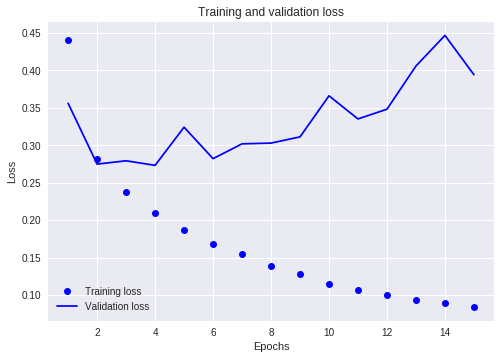

In [28]:
loss = hist.history['loss']
val_loss = hist.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

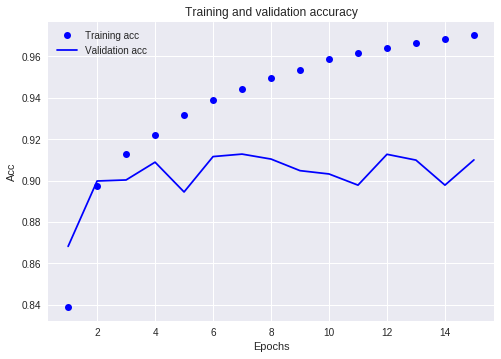

In [29]:
acc = hist.history['acc']
val_acc = hist.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()

plt.show()

With this convnet, we get ~91% accuracy on our validation set, compared to 87% from the dense network in session 2. However this model overfits after a few epochs. 

**Fight overfitting**

We add a dropout layer right before the dense layer.

In [30]:
model = models.Sequential()
# (1 convolution layer & 1 pooling layer) * 2
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(800, activation='relu'))
# softmax
model.add(layers.Dense(10, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 1600)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 800)               1280800   
__________

In [31]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
hist = model.fit(x_train, y_train, epochs=15, batch_size=64, validation_data=(x_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 11s 177us/step - loss: 0.4837 - acc: 0.8239 - val_loss: 0.4357 - val_acc: 0.8360
Epoch 2/15
60000/60000 [==============================] - 10s 173us/step - loss: 0.3382 - acc: 0.8769 - val_loss: 0.3037 - val_acc: 0.8893
Epoch 3/15
14912/60000 [======>.......................] - ETA: 7s - loss: 0.3088 - acc: 0.887360000/60000 [==============================] - 10s 174us/step - loss: 0.3097 - acc: 0.8871 - val_loss: 0.3008 - val_acc: 0.8890
Epoch 4/15
60000/60000 [==============================] - 10s 173us/step - loss: 0.2933 - acc: 0.8931 - val_loss: 0.3158 - val_acc: 0.8854
Epoch 5/15
41344/60000 [===================>..........] - ETA: 3s - loss: 0.2872 - acc: 0.896860000/60000 [==============================] - 10s 173us/step - loss: 0.2856 - acc: 0.8970 - val_loss: 0.3225 - val_acc: 0.8914
Epoch 6/15
60000/60000 [==============================] - 10s 172us/step - loss: 0.2775 -

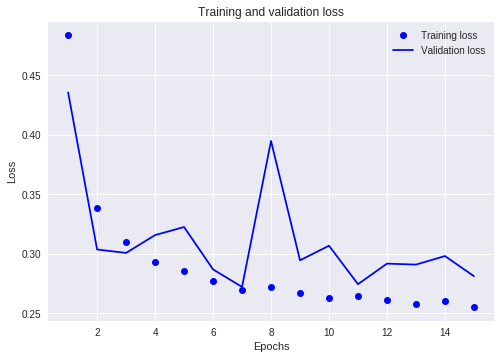

In [32]:
loss = hist.history['loss']
val_loss = hist.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

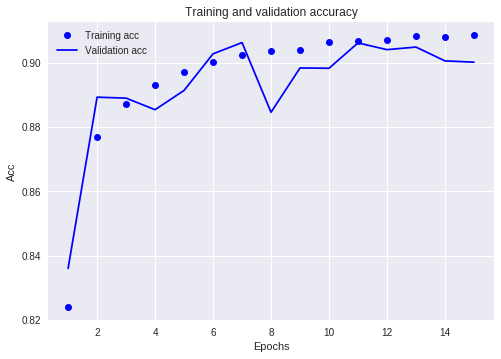

In [33]:
acc = hist.history['acc']
val_acc = hist.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()

plt.show()

Adding a dropout layer, the model stil overfits, however the validation curves are closer to the training curves than the previous model.